## Manipulating and Plotting Data in the Notebook (part 2)

organized by *Todd Gureckis, Brenden Lake, Alex Rich* in 2018, *Anselm Rothe* in 2019
<br> updated by *Graham Flick* in 2020

---

<div class="alert alert-info">
This introduction to Jupyter Notebook is based on tutorials developed by <a href="http://www.jesshamrick.com">Jessica Hamrick</a>.
</div>

One of the coolest things about the notebook is the ability to display data and plots inline. To take a working example, let's say we've run an experiment on psychological similarity, collecting similarity ratings from participants on color and kinship relations.

(Note: data for this notebook has been adapted from Michael Lee's repository of similarity datasets: http://faculty.sites.uci.edu/mdlee/similarity-data/)

---

## Importing Libraries

Before we get into loading and plotting data, we'll import the libraries we'll be working with. It is considered good practice to import all the libraries you need *first*, at the top of the notebook (or file), so that you can easily find what's been imported and what hasn't. Additionally, this makes it easier to find where certain functions may have come from.

In [1]:
# "pd" is the standard abbreviation for "pandas", "plt" is the standard
# abbreviation for "matplotlib" (pyplot), and "np" is the standard abbreviation for "numpy"
import pandas as pd               
import numpy as np
import matplotlib.pyplot as plt

# some helper functions we'll use later
from util import mds

# this is a helper library the wraps around plotly (https://plot.ly)
#import plotlywrapper as pw

---

## Loading Data

The first thing we need to do is to actually load our data from somewhere. Using the [pandas library](http://pandas.pydata.org/), we can trivially load CSV files

In [2]:
colors = pd.read_csv("data/color_similarities.csv")

When we read in the CSV file with pandas, it creates what is known as a `DataFrame` object. This dataframe contains tabular data with labeled rows and columns, similar to how you would use a spreadsheet. We can visualize what's actually in the dataframe by printing it out:

In [3]:
colors.head()

,wavelength1,wavelength2,rating
0,434,434,1.000000
1,434,445,0.978166
2,434,465,0.874416
3,434,472,0.874416
4,434,490,0.751758


We can see from this that there are three columns, with the first two corresponding to the pair of wavelengths that are being compared, and the third corresponding to the similarity rating (with 1 being the highest, and 0 being the lowest).

The `.head()` method used abovce just shows the first few rows. If we wanted to display the whole dataframe, we could just put `colors` on its own line. However, note that pandas automatically truncates the output to avoid it getting too long:

In [4]:
colors

,wavelength1,wavelength2,rating
0,434,434,1.000000
1,434,445,0.978166
2,434,465,0.874416
3,434,472,0.874416
4,434,490,0.751758
...,...,...,...
191,674,600,0.815719
192,674,610,0.913454
193,674,628,0.944170
194,674,651,0.960271


### Converting a DataFrame to an Array

Dataframes are really easy to work with, and make data analysis much easier. However, for now we're just going to reshape the data a bit, and come back to the more advances use cases later.

Currently, the data is effectively just a vector of numbers, but what would be more useful to have is a matrix where each entry corresponds to the similarity of a different pair of colors. Pandas makes this easy to change by using the `.pivot()` function. Here, the different keywords indicate which column should correspond to rows (`index`), which column should correspond to columns (`columns`), and which column should correspond to the data (`values`):

In [5]:
pivoted_colors = colors.pivot(index="wavelength1", columns="wavelength2", values="rating")
pivoted_colors

wavelength2,434,445,465,472,490,504,537,555,584,600,610,628,651,674
wavelength1,,,,,,,,,,,,,,
434,1.000000,0.978166,0.874416,0.874416,0.751758,0.592717,0.615033,0.534020,0.433677,0.615033,0.651414,0.693060,0.704648,0.734707
445,0.978166,1.000000,0.899657,0.881151,0.780808,0.651414,0.615033,0.615033,0.433677,0.534020,0.615033,0.680464,0.704648,0.715376
465,0.874416,0.899657,1.000000,0.969495,0.890699,0.743483,0.666667,0.634363,0.433677,0.333333,0.433677,0.333333,0.566323,0.492374
472,0.874416,0.881151,0.969495,1.000000,0.910798,0.799313,0.666667,0.651414,0.433677,0.333333,0.000000,0.333333,0.433677,0.534020
490,0.751758,0.780808,0.890699,0.910798,1.000000,0.928443,0.830454,0.804991,0.615033,0.433677,0.433677,0.333333,0.433677,0.000000
504,0.592717,0.651414,0.743483,0.799313,0.928443,1.000000,0.930797,0.884404,0.715376,0.634363,0.433677,0.433677,0.433677,0.333333
537,0.615033,0.615033,0.666667,0.666667,0.830454,0.930797,1.000000,0.954441,0.780808,0.715376,0.566323,0.433677,0.433677,0.000000
555,0.534020,0.615033,0.634363,0.651414,0.804991,0.884404,0.954441,1.000000,0.839505,0.759585,0.534020,0.492374,0.433677,0.433677
584,0.433677,0.433677,0.433677,0.433677,0.615033,0.715376,0.780808,0.839505,1.000000,0.921143,0.856067,0.810455,0.767010,0.787243


---

## Plotting in the Notebook

We are now ready to create our first plot! Since our data is now in a $N\times N$ array format, an easy first plot is the `matshow` plot type, which displays a heatmap of matrix values:

(14, 14)

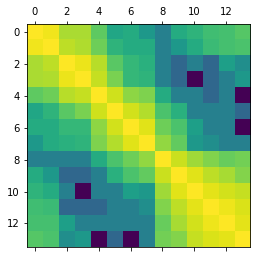

In [6]:
plt.matshow(pivoted_colors)
np.shape(pivoted_colors)

Note how the plot is displayed inline with the rest of the notebook. This is a really cool feature of the notebook, because it means you can always figure out how a plot was generated: simply look at the cell above it!

However, this is not a very useful visual representation of similarity judgments. To get a better visualization, we can reduce the data down to two dimensions using the multidimensional scaling (MDS) technique, a classic computational modeling technique from Roger Shepard:

* Shepard, R. N. (1980). Multidimensional Scaling, Tree-Fitting, and Clustering. *Science, 210*(4468), 390–398.

I have provided for you here a function (which under the hood uses the [scikit-learn library](http://scikit-learn.org/)) which computes the MDS solution:

In [7]:
mds_colors = mds(pivoted_colors)
mds_colors

,label,x,y
0,434,-0.428512,-0.174495
1,445,-0.406710,-0.209747
2,465,-0.260319,-0.425402
3,472,-0.200744,-0.471378
4,490,0.088991,-0.471238
5,504,0.265083,-0.375652
6,537,0.439988,-0.252703
7,555,0.510181,-0.140134
8,584,0.328258,0.291388
9,600,0.167199,0.417730


If you want to see what the `mds` function is doing, remember that you can look at the source using double question marks:

In [8]:
mds??

We can now plot the MDS solution as a regular scatter plot:

Text(0, 0.5, 'y')

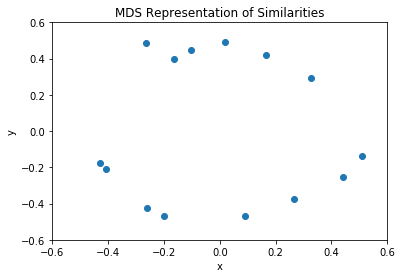

In [9]:
p=plt.scatter(x=mds_colors["x"], y=mds_colors["y"])
plt.xlim((-0.6,0.6))
plt.ylim((-0.6,0.6))
plt.title("MDS Representation of Similarities")
plt.xlabel("x")
plt.ylabel("y")

That's nice, but doesn't tell us a whole lot since we can't tell which point is which color. One option is to add text next to each point indicating the wavelength of the color, using the `plt.annotate` command:

[434. 445. 465. 472. 490. 504. 537. 555. 584. 600. 610. 628. 651. 674.]


Text(0, 0.5, 'y')

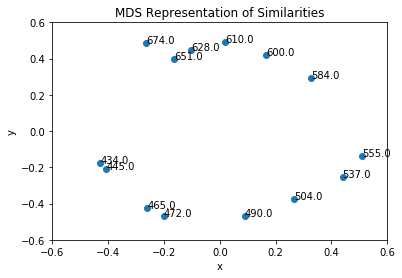

In [10]:
labels = np.array([row["label"] for _, row in mds_colors.iterrows()])
print(labels)
plt.scatter(x=mds_colors["x"], y=mds_colors["y"])
for i, txt in enumerate(labels):
    plt.annotate(txt, (mds_colors["x"][i], mds_colors["y"][i]))
plt.xlim((-0.6,0.6))
plt.ylim((-0.6,0.6))
plt.title("MDS Representation of Similarities")
plt.xlabel("x")
plt.ylabel("y")


An even cooler option would be to actually color the points according to which color they represent. I have provided another dataset that converts the wavelengths to RGB values:

In [11]:
rgba = pd.read_csv("data/color_rgba.csv", index_col="wavelength")
rgba

,R,G,B,A
wavelength,,,,
434,0.065812,0.000000,1.000000,1.0
445,0.000000,0.275946,1.000000,1.0
465,0.000000,0.699752,1.000000,1.0
472,0.000000,0.819739,1.000000,1.0
490,0.000000,1.000000,0.619855,1.0
504,0.101291,1.000000,0.000000,1.0
537,0.639101,1.000000,0.000000,1.0
555,0.872174,1.000000,0.000000,1.0
584,1.000000,0.731866,0.000000,1.0


Text(0, 0.5, 'y')

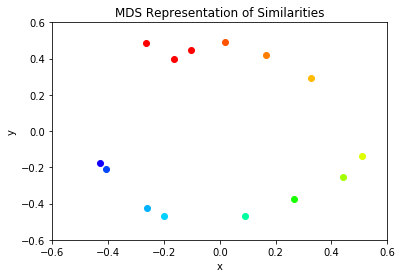

In [12]:
colormarkers = [tuple(x) for x in rgba.to_numpy()]
for i in range(len(mds_colors)):
    plt.scatter(mds_colors["x"][i], mds_colors["y"][i],  color=colormarkers[i])
plt.xlim((-0.6,0.6))
plt.ylim((-0.6,0.6))
plt.title("MDS Representation of Similarities")
plt.xlabel("x")
plt.ylabel("y")

---

## Exercise: Plotting Kinship Relations

<div class="alert alert-success">
<h3> Problem 13</h3> 
I have also provided a dataset of similarities between kinship relations, located in `data/kinship_similarities.csv`. Try loading this file and creating a MDS plot similar to the one above, but for these kinship relations.
</div>

In [14]:
# Enter your code here